<a href="https://colab.research.google.com/github/nadavschwalb/image_processing/blob/main/Lab_5_preliminary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd '/content/drive/My Drive/image_processing/Lab_5'
import os
path = os.getcwd() 
print('path: ' + path)

/content/drive/My Drive/image_processing/Lab_5
path: /content/drive/My Drive/image_processing/Lab_5


In [12]:
%matplotlib inline 
import numpy as np
import matplotlib.pylab as plt
import cv2
import skimage

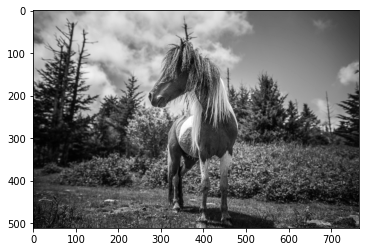

In [24]:
pony_img = cv2.imread('pony.jpg')
pony_img = cv2.cvtColor(pony_img,cv2.COLOR_RGB2GRAY)
plt.imshow(pony_img, cmap='gray')
plt.show()

In [103]:
def inverse_filter(noise_img,filter_blur):
  degraded_dft = np.fft.fftshift(np.fft.fft2(noise_img))
  blur_dft = np.fft.fftshift(np.fft.fft2(filter_blur,(noise_img.shape[0],noise_img.shape[1])))
  restored_dft = degraded_dft/blur_dft
  return np.abs(np.fft.ifft2(restored_dft))

def psuedo_inverse_filter(noise_img,filter_blur,epsilon=0.5):
    degraded_dft = np.fft.fftshift(np.fft.fft2(noise_img))
    blur_dft = np.fft.fftshift(np.fft.fft2(filter_blur,(noise_img.shape[0],noise_img.shape[1])))
    vectorize_threshold = np.vectorize(lambda x : 1/x if x > epsilon else 0)
    psuedo_inverse_filter = vectorize_threshold(np.abs(blur_dft))
    restored_dft = degraded_dft*psuedo_inverse_filter
    return np.abs(np.fft.ifft2(restored_dft))

def weiner_filter(noise_img,filter_blur,sigma=0.01, alpha=0.095):
    degraded_dft = np.fft.fftshift(np.fft.fft2(noise_img))
    blur_dft = np.fft.fftshift(np.fft.fft2(filter_blur,(noise_img.shape[0],noise_img.shape[1])))
    conjugate_blur_dft = np.conjugate(blur_dft)
    abs_square_blur = np.square(np.abs(blur_dft))
    weiner_dft = np.zeros(blur_dft.shape)
    for i,row in enumerate(weiner_dft):
      for j,cell in enumerate(row):
        weiner_dft[i,j] = conjugate_blur_dft[i,j]/(abs_square_blur[i,j]+ alpha*np.square(sigma)*(i**2 + j**2))
    restored_dft = degraded_dft*weiner_dft
    return np.abs(np.fft.ifft2(restored_dft))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


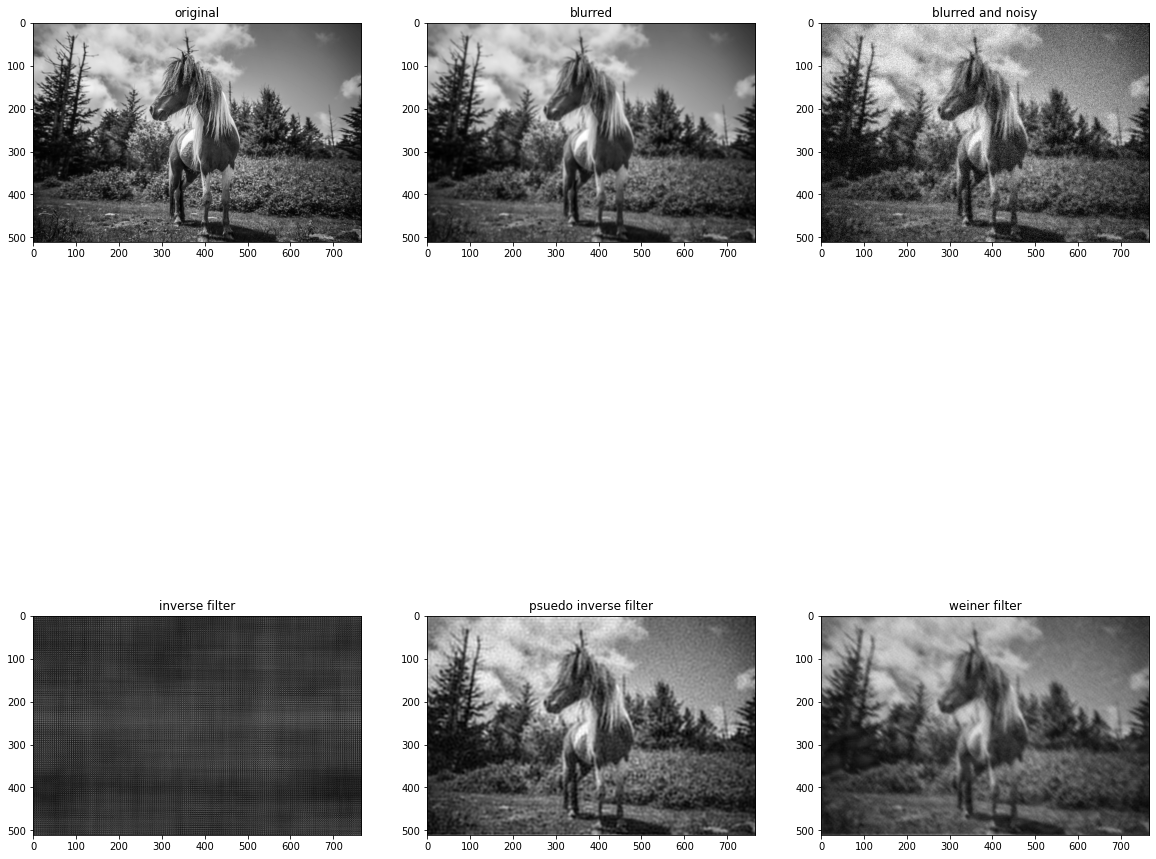

In [104]:
blur_kernel = np.ones((5,5))/25

blurred_pony_img = cv2.filter2D(pony_img,-1,blur_kernel)
noisy_pony_img = skimage.util.random_noise(pony_img)
blurred_noisy_pony = skimage.util.random_noise(cv2.boxFilter(pony_img,-1,(5,5)))

inverse_restored_blured = inverse_filter(blurred_pony_img,blur_kernel)
psuedo_restored_blured = psuedo_inverse_filter(blurred_noisy_pony,blur_kernel,epsilon=0.5)
wiener_restored_blured = weiner_filter(blurred_noisy_pony,blur_kernel,sigma=0.01,alpha=0.095)



fig ,axis = plt.subplots(nrows=2,ncols=3,figsize = (20,20))
axis[0,0].set_title('original')
axis[0,0].imshow(pony_img,cmap ='gray')
axis[0,1].set_title('blurred')
axis[0,1].imshow(blurred_pony_img,cmap ='gray')
axis[0,2].set_title('blurred and noisy')
axis[0,2].imshow(blurred_noisy_pony,cmap ='gray')
axis[1,0].set_title('inverse filter')
axis[1,0].imshow(inverse_restored_blured,cmap ='gray')
axis[1,1].set_title('psuedo inverse filter')
axis[1,1].imshow(psuedo_restored_blured,cmap ='gray')
axis[1,2].set_title('weiner filter')
axis[1,2].imshow(wiener_restored_blured,cmap ='gray')